# Анализ гипотез по увеличению выручки

1. Часть 1. Приоритизация гипотез - oценка 9 гипотез с использование фреймфорков ICE и RICE
2. Часть 2. Анализ A/B-теста

Цели:
* Часть 1. - выявить наиболее приоритетные для проверки гипотезы по увеличению выручки;
* Часть 2. - определить различие между группами тестирования и возмозность завершения теста.


## Описание данных
Для исследования предоставлены данные:
1. Файл /datasets/hypothesis.csv.
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. Файл /datasets/orders.csv
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

3. Файл /datasets/visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
#импорт данных
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

try: 
    hypothesis = pd.read_csv('hypothesis.csv') 
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except: 
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') 
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv') 

## Часть 1. Приоритизация гипотез
Оценка предоставленных гипотез с использование фреймфорков ICE и RICE

In [2]:
#анализ данных
pd.options.display.max_colwidth = 110
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Вывод**

Датасет содержит информацию о 9 гипотезах. Пропусков нет. Дубликатов нет. Данные в подходящем формате.

### Применение модели ICE

In [4]:
pd.options.display.max_colwidth = 110
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод**

Исходя из объёма изменений, уверенности в результате и затрат на реализацию, наиболее приоритетными являются гипотезы:
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Применение модели RICE

In [5]:
pd.options.display.max_colwidth = 110
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**

С учетом охвата пользователей, которых коснутся изменения порядок приоритетности следующий:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
3. С одинаковым приоритетом:
    * добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;	
    * показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.



## Часть 2. Анализ A/B-теста

### Предобработка данных

In [6]:
#функция для предобработки данных
def pred (df):
    print('HEAD')
    print(df.head())
    print('='*50)
    print('INFO')
    print(df.info())
    print('='*50)
    print('ПРОПУСКИ')
    print(df.isna().sum())
    print('='*50)
    print('ПОЛНЫЕ ДУБЛИКАТЫ')
    print(df.duplicated().sum())
   

In [7]:
df = orders
pred(df)

HEAD
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
ПРОПУСКИ
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
ПОЛНЫЕ ДУБЛИКАТЫ
0


In [8]:
#преобразование ID в категории
orders['transactionId'] = orders['transactionId'].astype('category')
orders['visitorId'] = orders['visitorId'].astype('category')

In [9]:
#подсчет уникальных заказов и посетителей
print('количество уникальных заказов', orders['transactionId'].nunique())
print('количество уникальных посетителей', orders['visitorId'].nunique())

количество уникальных заказов 1197
количество уникальных посетителей 1031


In [10]:
print('минимальная дата', orders['date'].min())
print('максимальная дата', orders['date'].max())

минимальная дата 2019-08-01
максимальная дата 2019-08-31


In [11]:
#распределения визитов по группам
orders.groupby('group')[['transactionId', 'visitorId', 'date']].nunique().reset_index()

,group,transactionId,visitorId,date
0,A,557,503,31
1,B,640,586,31


*сумма уникальных посетителей в каждой группе больше суммы уникальных посетителей в целом - часть посетителей присутствует в обеих группах*

In [12]:
#количество посетителей, присутствующих в обеих группах 
visitorsA = orders.loc[orders['group'] == 'A', 'visitorId']
visitorsB = orders.loc[orders['group'] == 'B', 'visitorId']
print(pd.merge(visitorsA, visitorsB, how ='inner', on =['visitorId']).nunique())

visitorId    58
dtype: int64


*58 посетителей присутствуют в обеих группах.*

In [13]:
#распределение стоимости заказов
orders.describe().round(2)

,revenue
count,1197.00
mean,8348.01
std,39191.13
min,50.00
25%,1220.00
50%,2978.00
75%,8290.00
max,1294500.00


**Вывод**
* Датасет содержит информацию о 1197 покупках и 1031 покупателе в период с 1 по 31 августа 2019г.
* 58 посетителей присутствуют в обеих группах.
* Максимальный чек составил 1294500 у.е., минимальный - 50. Половина заказов  в диапазоне от 50 до 2978 у.е.
* Данные распределены на A и B, в обоих группах есть данные за весь период.
* Пропусков нет. 
* Полных дубликатов нет. 
* Представленные в виде чисел transactionId и visitorId преобразованы в формат категорий.	

In [14]:
df = visitors
pred(df)

HEAD
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
ПРОПУСКИ
date        0
group       0
visitors    0
dtype: int64
ПОЛНЫЕ ДУБЛИКАТЫ
0


In [15]:
#распределения визитов по группам
visit_parts = visitors.groupby('group').agg({'visitors': 'sum', 'date': 'nunique'}).reset_index()
visit_parts['visitors_percent'] = (visit_parts['visitors'] / visit_parts['visitors'].sum() * 100).round(2)
visit_parts

,group,visitors,date,visitors_percent
0,A,18736,31,49.76
1,B,18916,31,50.24


In [16]:
print('минимальная дата', visitors['date'].min())
print('максимальная дата', visitors['date'].max())

минимальная дата 2019-08-01
максимальная дата 2019-08-31


**Вывод**
* Датасет содержит информацию о количестве визитов за 31 день для обоих групп.
* Период отчета аналогичен предыдущей данным о заказах.
* Пропусков нет. 
* Полных дубликатов нет. 
* Данные в подходящих форматах.
* Визиты распределены по группам соразмерно: в группе A - 49.76%, в группе B - 50.24% от общего количества.


### Кумулятивные метрики

In [17]:
#Расчет кумулятивных метрик, сводная таблица с разбивкой по группам
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
print(data.head())

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

#### график кумулятивной выручки по группам

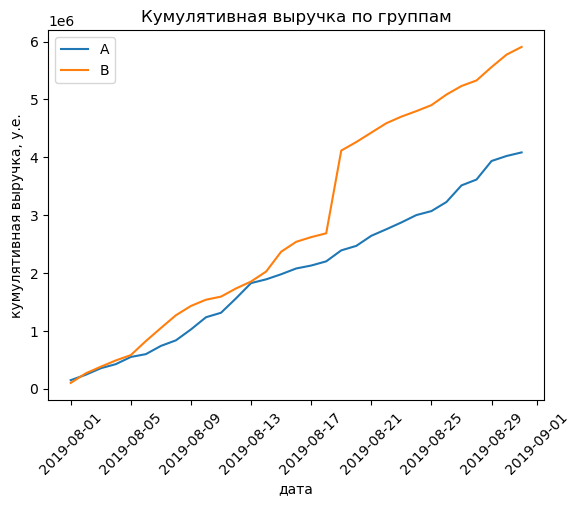

In [18]:
plt.plot(data['date'], data['revenueCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('дата')
plt.ylabel('кумулятивная выручка, у.е.')
plt.xticks(rotation=45)
plt.legend() 
plt.show()

**Вывод**

График кумулятивной выручки группы B выше группы A на всём диапазоне, кроме первого дня.

Графики групп практически параллельны за исключением резкого скачка в группе B 17 числа. Это может быть связано с аномальной стоимостью одного заказа.


#### график кумулятивного среднего чека по группам

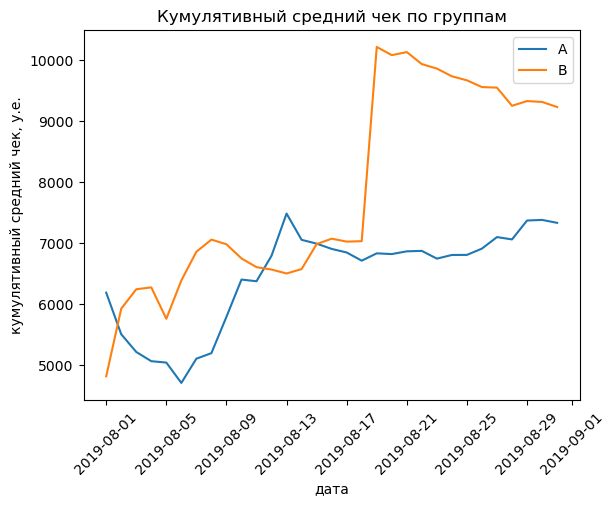

In [19]:
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('дата')
plt.ylabel('кумулятивный средний чек, у.е.')
plt.xticks(rotation=45)
plt.legend() 
plt.show()

**Вывод**

График кумулятивного среднего чека группы B выше группы A практичсеки на всём диапазоне, кроме первого дня и периода с 11 по 15-е число. 

На графике группы B резкий всплеск 17 числа, что подтверждает наличие аномалии. 

После 13-ого числа графики стабилизируются, за исключением аномалии группы B.

График группы B после 17 числа имеет ниспадающую динамику. В случае исключения аномалии, возможно кумулятивный средний чек группы B был бы ниже, чем по группе А.

#### график относительного изменения кумулятивного среднего чека группы B к группе A

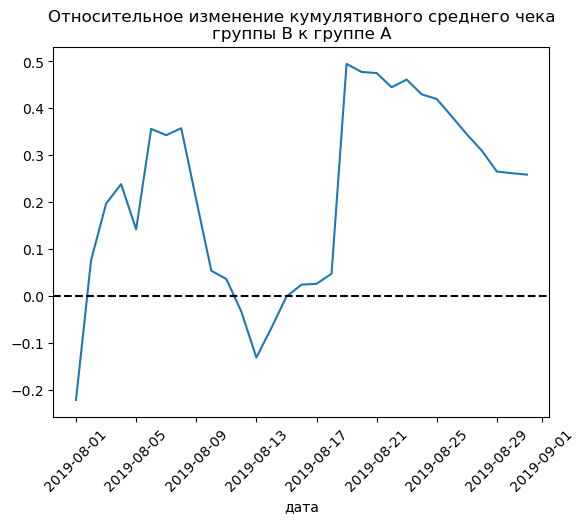

In [20]:
# cтроим отношение средних чеков
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека\nгруппы B к группе A')
plt.xlabel('дата')
plt.xticks(rotation=45) 
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Выводы**
График относительного изменения кумулятивного среднего чека группы B к группе A показывает большие колебания, дублирующие график кумулятивного среднего чека: в периоды отрицательных значений кум. ср. чек группы В меньше кум. ср. чека группы А. 

Первый крупный всплеск выхван колебаниями значений, второй - аномалией. 

После выброса 17-ого числа динамика отношения стремиться вниз, что говорит об уменьшении различия.

По графику нельзя сделать вывод, стабилизоровалось ли отношение на положительном уровне или продолжит спад. 

#### график кумулятивного среднего количества заказов на посетителя по группам

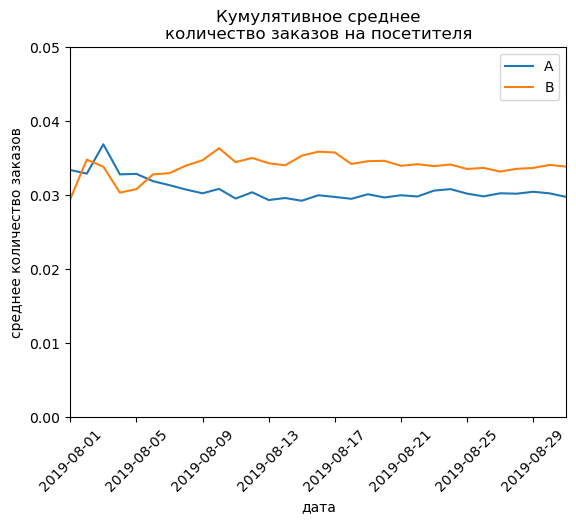

In [21]:
# строим графики
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA'], label='A')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB'], label='B')
plt.title('Кумулятивное среднее\nколичество заказов на посетителя')
plt.xlabel('дата')
plt.ylabel('среднее количество заказов')
plt.xticks(rotation=45)
plt.legend()
plt.xticks(rotation=45)
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])
plt.show()

**Выводы**

График кумулятивного среднего количества заказов на посетителя демонстрирует колебания в первые 3 дня. 

После 5-ого числа показвтели группы В стабильно выше группы А - среднее количество заказов на посетителя в группе В стабильно выше.

#### график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

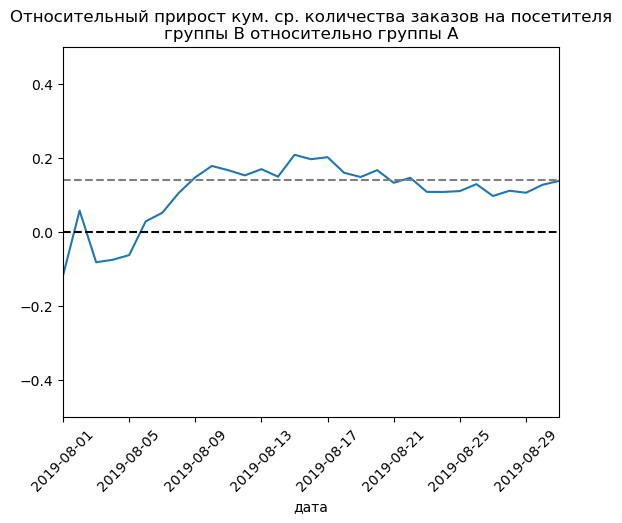

In [22]:
plt.plot(data['date'], (data['ordersCummulativeB']/data['visitorsCummulativeB'])/(data['ordersCummulativeA']/data['visitorsCummulativeA'])-1,)
plt.title('Относительный прирост кум. ср. количества заказов на посетителя\nгруппы B относительно группы A')
plt.xlabel('дата')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.show()

**Выводы**

Отношение изменения кумулятивного среднего количества заказов на посетителя стабильно ниже 0 - группа В стабильно лучше группы А. 

Тест можно завершать. 

### Определение аномалий

#### точечный график количества заказов по пользователям

In [23]:
print(orders.head())

  transactionId   visitorId       date  revenue group
0    3667963787  3312258926 2019-08-15     1650     B
1    2804400009  3642806036 2019-08-15      730     B
2    2961555356  4069496402 2019-08-15      400     A
3    3797467345  1196621759 2019-08-15     9759     B
4    2282983706  2322279887 2019-08-15     2308     B


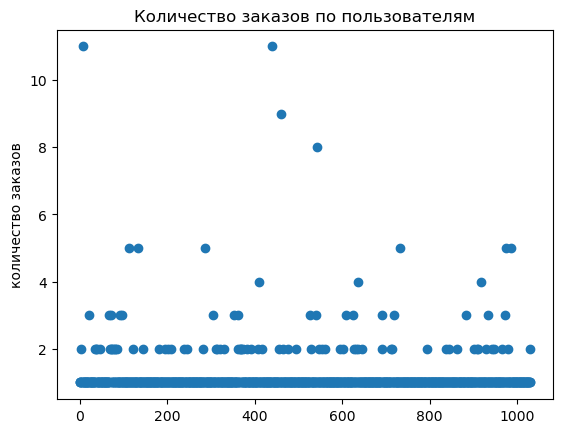

In [24]:
#группировка заказов по посетителям
ordersByVisitor = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'}).sort_values('visitorId', ascending=False)
ordersByVisitor.columns = ['visitorId', 'orders']
plt.title('Количество заказов по пользователям')
plt.ylabel('количество заказов')
x_values = pd.Series(range(0, len(ordersByVisitor)))
plt.scatter(x_values, ordersByVisitor['orders']) 

#### 95-й и 99-й перцентили количества заказов на пользователя, граница для определения аномальных пользователей

In [25]:
np.percentile(ordersByVisitor['orders'], [95, 99])

array([2., 4.])

**Выводы**

5% покупателей делали больше 2 заказов, <br>
1% - больше 4.

#### точечный график стоимостей заказов

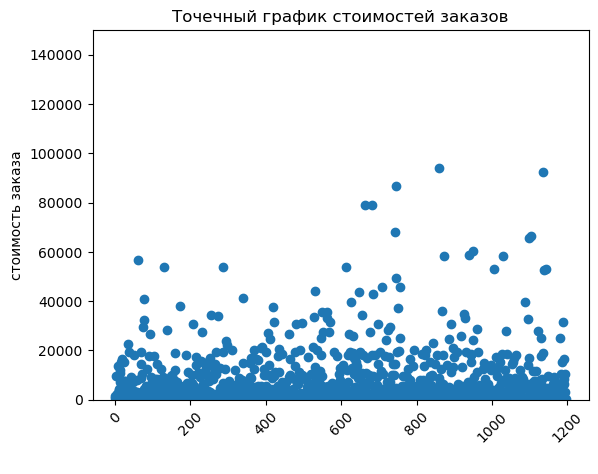

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylim([0,150000]) #увеличение масштаба без учета аномалий.
plt.title('Точечный график стоимостей заказов')
plt.xlabel(' ')
plt.ylabel('стоимость заказа')
plt.xticks(rotation=45)
plt.show()

#### 95-й и 99-й перцентили стоимости заказов, граница для определения аномальных заказов

In [27]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Выводы**

5% заказов стоили больше 28000,0 у.е.,
<br>1% - больше 58233,2.

### Статистическая значимость

#### статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
Для проверки статистической значимости различий полученных при расчетах, использован метод Манна-Уитни, как менее подверженный влиянию выбросов и подходящий для небольшого объёма данных. 

Уровень статистической значимости alpha принят 0,05.

Сформулированы гипотезы:
* H0 - разница между группами статистически не значительна
* H1 - между группами есть статистически значимая разница

In [28]:
#определение групп сравнения
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


In [29]:
#определение статистической значимости
alpha = 0.05  # критический уровень статистической значимости
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-значение: ', '{0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
print('относительное различие:' ,"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))  

p-значение:  0.017
Отвергаем нулевую гипотезу: разница статистически значима
относительное различие: 0.138


#### статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
H0 - разница между группами статистически не значительна<br>
H1 - между группами есть статистически значимая разница

In [30]:
#определение статистической значимости
alpha = 0.05  # критический уровень статистической значимости
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-значение: ', '{0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
print('относительное различие:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
относительное различие: 0.259


#### Очистка от аномалий
Удалим аномалии исходя из 1% максимальных значений: количество заказов свыше 4 и стоимость закзаза свыше 58233.2 у.е.


In [31]:
#список аномальных заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByVisitor['orders'], [99]))]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByVisitor['orders'], [99]))]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#фильтрация аномалий по группе А
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#фильтрация аномалий по группе B
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [32]:
print('Отфильтрованый объём данных по группе A: {:.2%}'.format( (len(sampleA) - len(sampleAFiltered)) / len(sampleA)))
print('Отфильтрованый объём данных по группе B: {:.2%}'.format( (len(sampleB) - len(sampleBFiltered)) / len(sampleB)))

Отфильтрованый объём данных по группе A: 0.08%
Отфильтрованый объём данных по группе B: 0.08%


#### статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
<br>H0 - разница между группами статистически не значительна
<br>H1 - между группами есть статистически значимая разница

In [33]:
alpha = 0.05  # критический уровень статистической значимости
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-значение: ', '{0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
print('относительное различие:' ,"{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))    

p-значение:  0.014
Отвергаем нулевую гипотезу: разница статистически значима
относительное различие: 0.153


#### статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
H0 - разница между группами статистически не значительна<br>
H1 - между группами есть статистически значимая разница

In [34]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )

print('p-значение: ', '{0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
print('относительное различие:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ))

p-значение:  0.851
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
относительное различие: -0.006


**Выводы**

Сравнение "сырых" и очищенных от аномалий данных показало:
* статистически значимое различие в среденем количестве заказов сохранилась, относительное различие увеличилось: с 0.138 до 0.153. Группа В лучше группы А;
* отсутствие статистически значимого различия в среденем чеке сохранилось, несмотря на значительное изменение отношения: с 0.259 до -0.06. 

## Решение по результатам теста

### Часть 1.
Для приоретизатии гипотез учтены параметры:
* влияние, 
* уверенность в результате, 
* затраты на реализацию,
* охват пользователей.

<br>Наиболее приоритетными из 9 гипотез являются следующие:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. С одинаковым приоритетом:
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

### Часть 2.
Результат А/В теста покзал следующее: группа В лучше группы А. 
<br>
<br>Статистичиески значимое различие имеет только количество заказов на 1 посетителя, этот показатель стабилизоровался и тест можно завершать. 